In [75]:
#Importing te dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Preprocessing

In [4]:
loan_dataset = pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')
type(loan_dataset)

pandas.core.frame.DataFrame

In [5]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
#number of rows and columns
loan_dataset.shape

(614, 13)

In [8]:
#checking the statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
#checking the missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
#dropping the missing values
loan_dataset = loan_dataset.dropna()

In [10]:
#checking if now any missing values are there
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
#label encoding
loan_dataset.replace({'Loan_Status':{'N':0, 'Y':1}}, inplace=True) #inplace is True means you want to replace all values

In [21]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [25]:
loan_dataset.shape



(480, 13)

In [26]:
loan_dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [27]:
#replacing 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value =4)

In [28]:
loan_dataset['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

Data Visualization

<Axes: xlabel='Education', ylabel='count'>

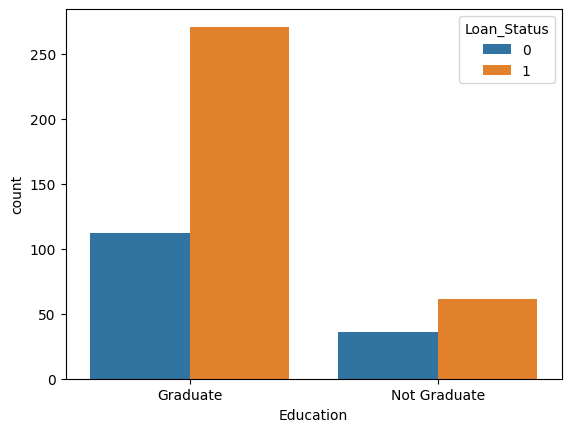

In [29]:
#education and loan status
sns.countplot(x='Education', hue = 'Loan_Status', data = loan_dataset )

<Axes: xlabel='Married', ylabel='count'>

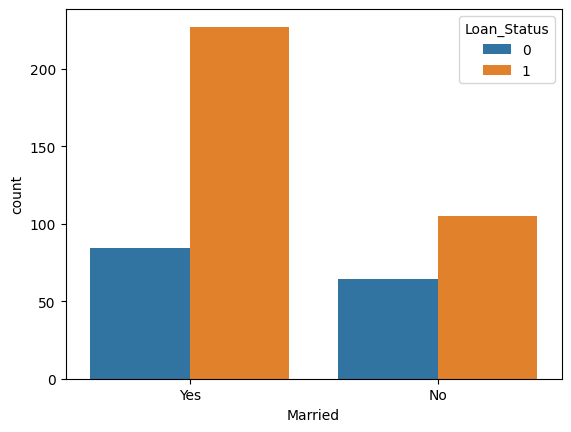

In [30]:
#marital status and loan status
sns.countplot(x='Married', hue = 'Loan_Status', data = loan_dataset)

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

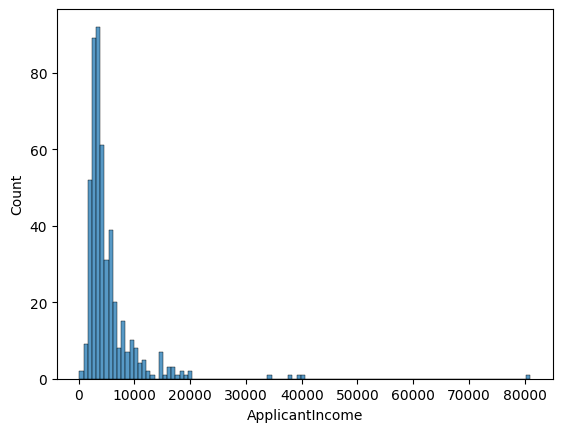

In [33]:
#Applicnt Income
sns.histplot(loan_dataset['ApplicantIncome'])

<Axes: xlabel='Credit_History', ylabel='count'>

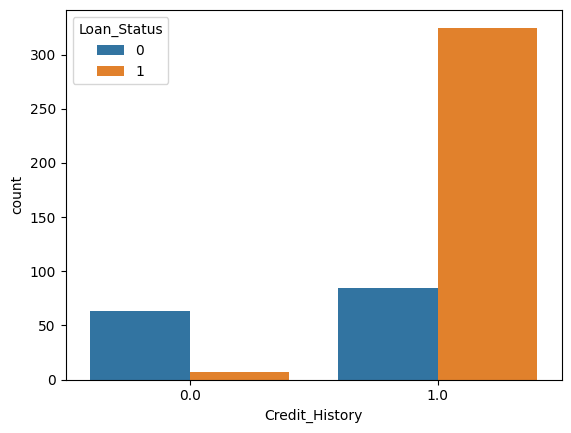

In [34]:
#credit history and loan status
sns.countplot(x='Credit_History', hue='Loan_Status', data = loan_dataset)

In [49]:
# converting the categorical columns to numerical values
loan_dataset.replace({'Married': {'No': 0, 'Yes': 1}, 'Self_Employed': {'No': 0, 'Yes': 1}, 'Property_Area': {'Urban': 0, 'Semiurban': 1, 'Rural': 2}, 'Education': {'Graduate': 1, 'Not Graduate': 0}, 'Gender': {'Male': 0, 'Female': 1}}, inplace=True)

In [50]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,0,1


In [53]:
#seperating the data and label
X = loan_dataset.drop(columns=['Loan_ID', 'Loan_Status'], axis = 1)
Y = loan_dataset['Loan_Status']
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         0        1          1          1              0             4583   
2         0        1          0          1              1             3000   
3         0        1          0          0              0             2583   
4         0        0          0          1              0             6000   
5         0        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       1        0          0          1              0             2900   
610       0        1          4          1              0             4106   
611       0        1          1          1              0             8072   
612       0        1          2          1              0             7583   
613       1        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Training and Testing Data

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, stratify = Y ,random_state = 2)
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


Training the model:
Support Vector Machine Model

In [58]:
classifier = svm.SVC(kernel = 'linear')


In [59]:
#training the support vector machine model
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Evaluation


In [63]:
#accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on training data: ', training_data_accuracy)

Accuracy on training data:  0.7847222222222222


In [66]:
#accuracy on testing data
X_test_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on testing data: ', testing_data_accuracy)

Accuracy on testing data:  0.8333333333333334


Making  a predictive system

In [85]:
input_data = (1,0,0,1,1,4583,0,133,360,0,1)
#changing the input data as numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshaping the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = classifier.predict(input_data_reshaped)
print(prediction)
if(prediction[0] == 0):
  print(' The person is not eligible for loan')
else:
  print('The person is eligible for loan')

[0]
 The person is not eligible for loan


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [84]:
input_data = (0,1,2,1,0,6540,0,205,360,1,1)
#changing the input data as numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshaping the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = classifier.predict(input_data_reshaped)
print(prediction)
if(prediction[0] == 0):
  print(' The person is not eligible for loan')
else:
  print('The person is eligible for loan')

[1]
The person is eligible for loan


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
